# IMPORTING REQUIRED LIBRARIES

In [1]:
# EDA Lbraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Models from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Model Evaluation Metrics
from sklearn.metrics import r2_score,explained_variance_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

# LOADING THE DATA

In [2]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df.describe(include=['O'])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [7]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [8]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [9]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [10]:
dummies = pd.get_dummies(df[['cut', 'color', 'clarity']], drop_first=True)
dummies

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53936,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53937,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
53938,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [11]:
df_small = df.drop(['cut', 'color', 'clarity'], axis=1)
df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.9 MB


In [12]:
df_expanded = pd.concat([df_small, dummies], axis=1)
df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Good       53940 non-null  uint8  
 8   cut_Ideal      53940 non-null  uint8  
 9   cut_Premium    53940 non-null  uint8  
 10  cut_Very Good  53940 non-null  uint8  
 11  color_E        53940 non-null  uint8  
 12  color_F        53940 non-null  uint8  
 13  color_G        53940 non-null  uint8  
 14  color_H        53940 non-null  uint8  
 15  color_I        53940 non-null  uint8  
 16  color_J        53940 non-null  uint8  
 17  clarity_IF     53940 non-null  uint8  
 18  clarit

# EDA (Exploratory Data Analysis)

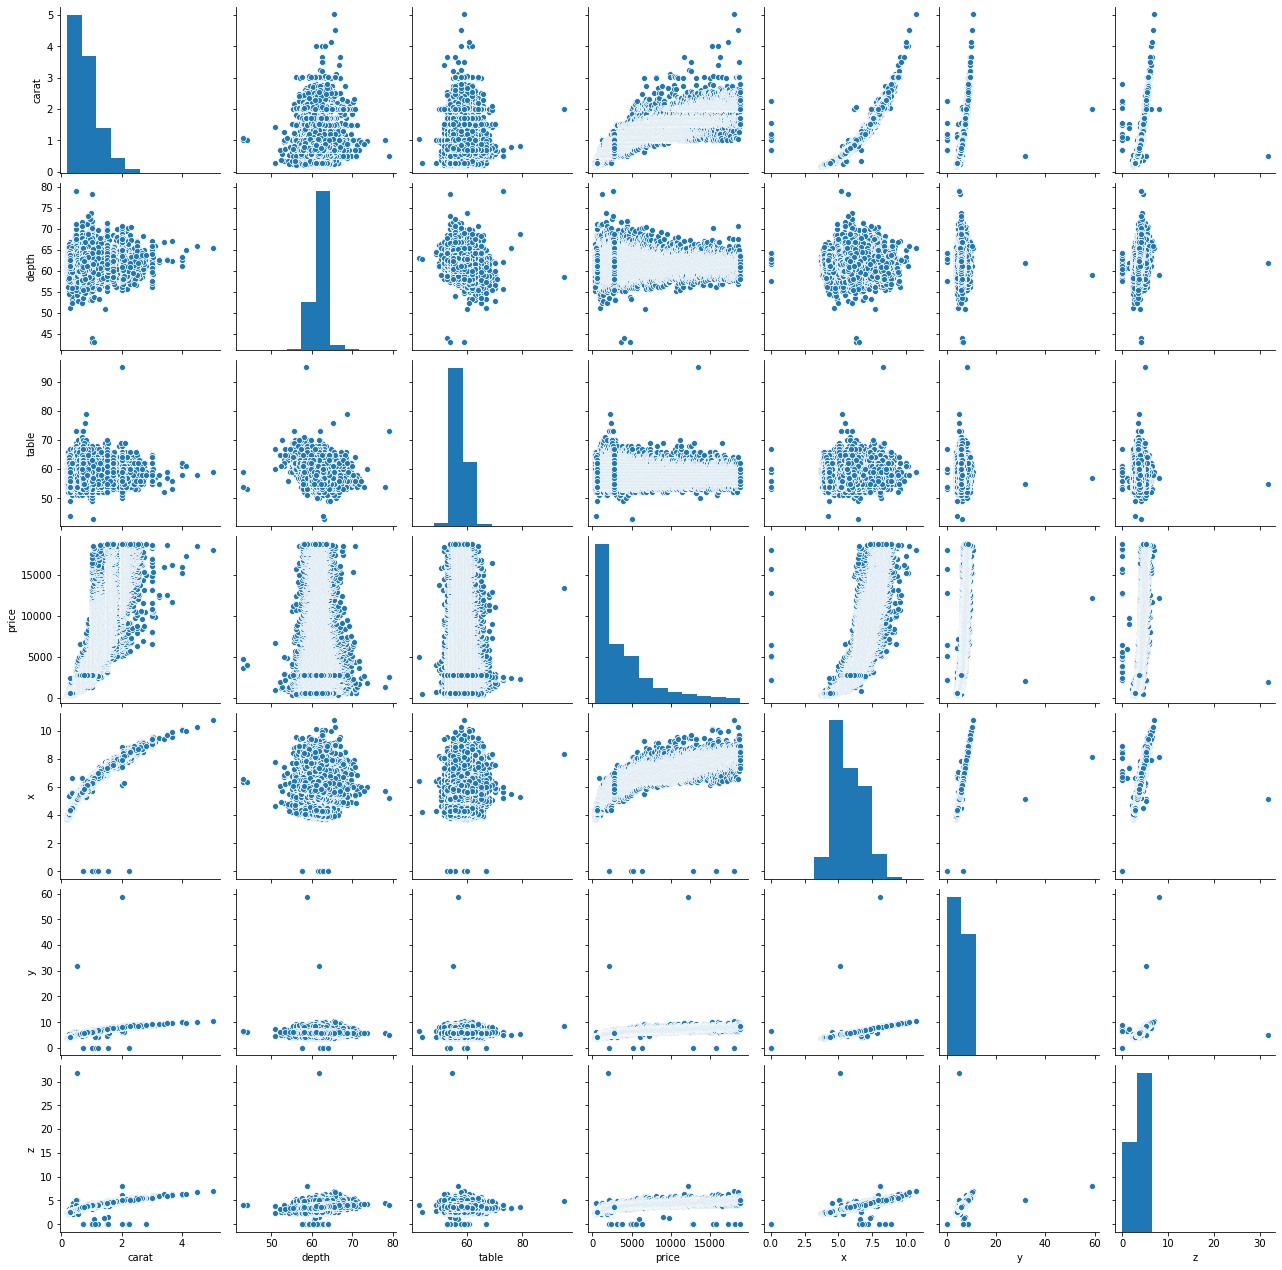

In [13]:
sns.pairplot(df)

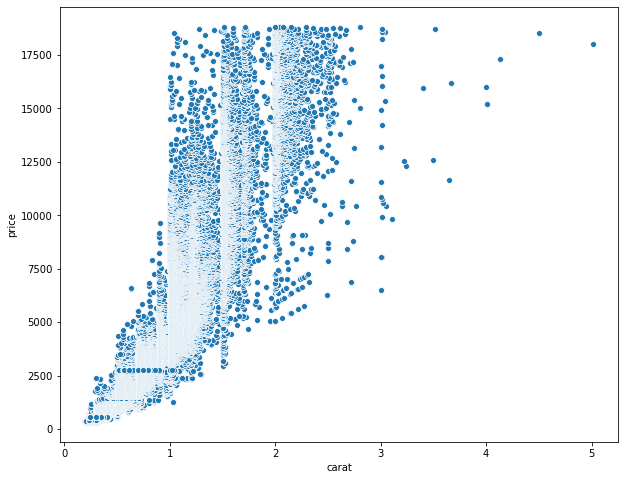

In [14]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='carat', y='price', data=df);

R squared is : 84.933%


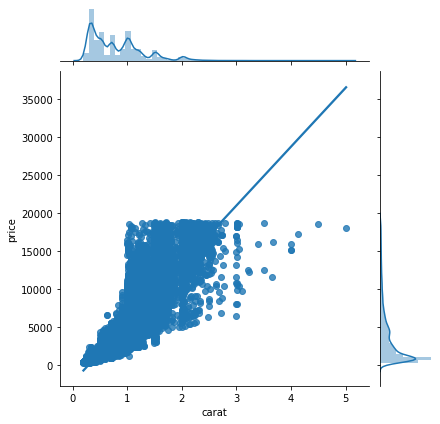

In [15]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x='carat', y='price', data=df, kind="reg")
a = r2(df['carat'], df['price'])
print(f'R squared is : {a*100:.3f}%')

In [16]:
# Correlation between Attributes
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


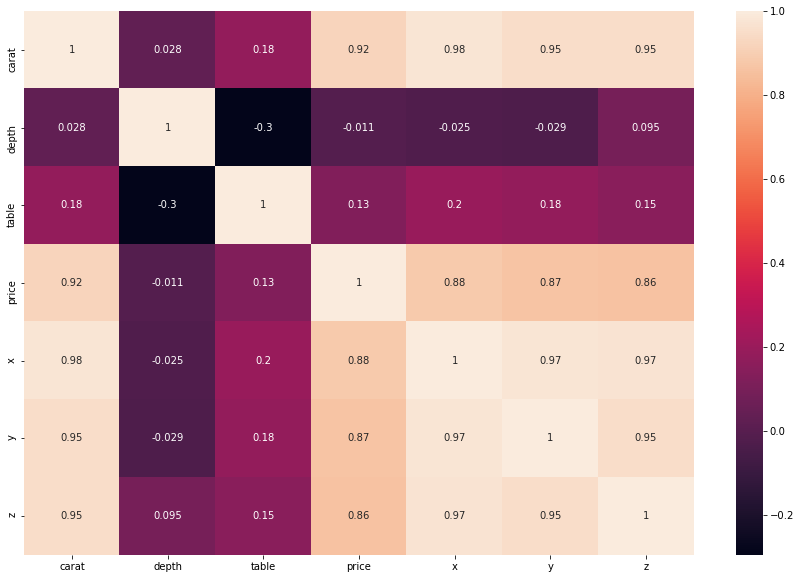

In [17]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

Looking at the correlation matrix we can say that 'carat', 'x', 'y', 'z' are highly related with price.

But looking at 'x', 'y','z' alone we can say that all three are highly correllated 

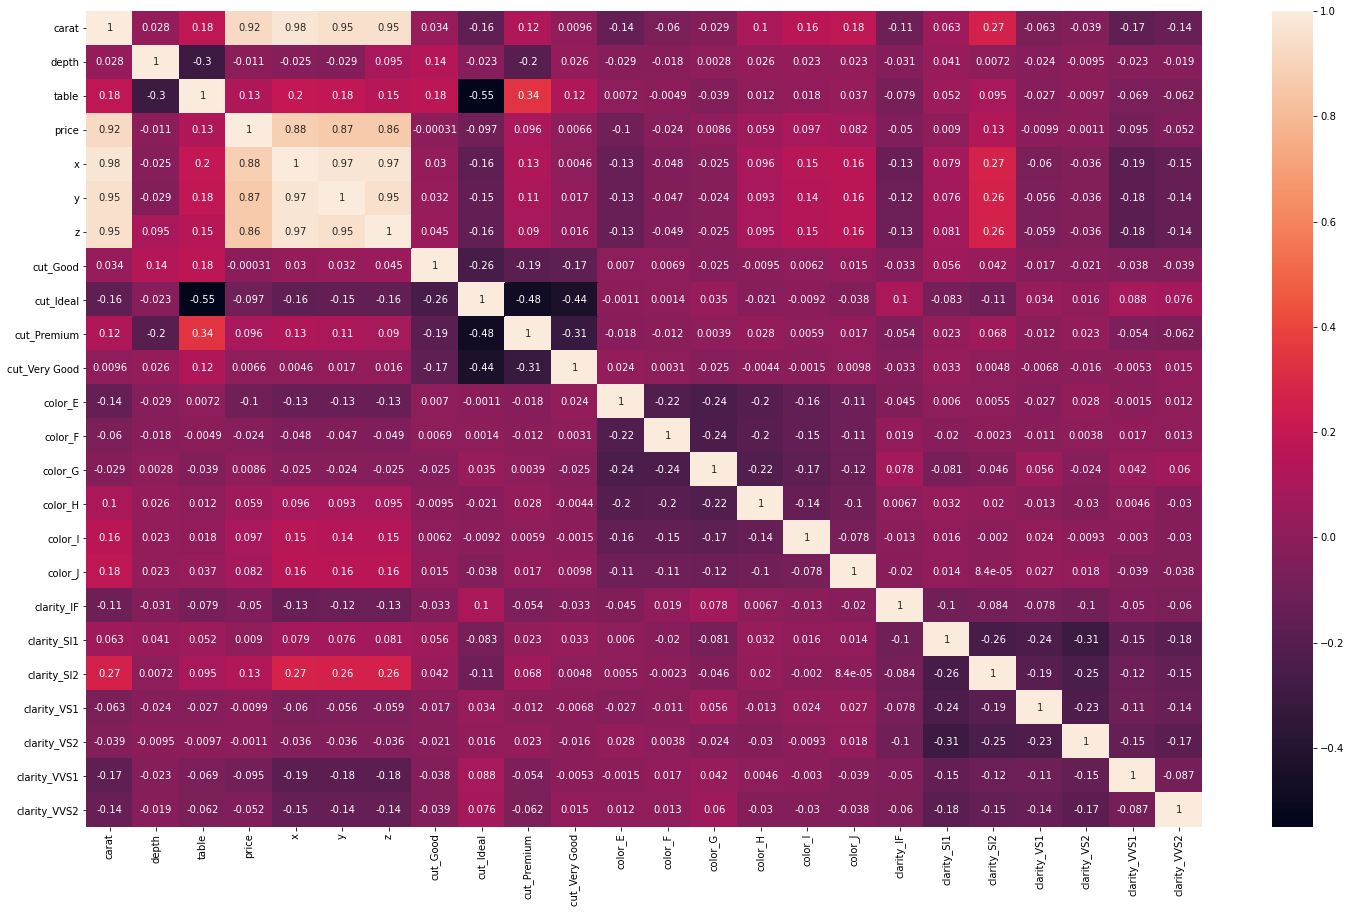

In [18]:
plt.figure(figsize=(25, 15))
sns.heatmap(df_expanded.corr(), annot=True)

In [19]:
df[['x', 'y','z']].corr()

,x,y,z
x,1.000000,0.974701,0.970772
y,0.974701,1.000000,0.952006
z,0.970772,0.952006,1.000000


Lets drop 'x' column and create our model from 'carat','y','z' colummns

# SELECTING THE DATA AND SPLITTING INTO TRAIN AND TEST

In [20]:
# Selecting Attributes
X = df[['carat', 'y', 'z']]

# Selecting Target 
y = df['price']

In [21]:
X.shape, y.shape

((53940, 3), (53940,))

In [22]:
53940 * 0.2

10788.0

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43152, 3), (10788, 3), (43152,), (10788,))

# MODEL BUILDING

In [24]:
# Create the object
model = LinearRegression()

# Fit the training data
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Checking the R2 score of the model

print(f'The R squared value is : {model.score(X_test, y_test):.2f}')

The R squared value is : 0.85


In [26]:
# Creating Predictions
y_pred = model.predict(X_test)

In [27]:
print(f'R squared value : {r2_score(y_test, y_pred):.2f}')

R squared value : 0.85


In [28]:
# Adjusted R-squared
1 - (1-model.score(X_test, y_test))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.8536628917068432

In [29]:
print(f'Explained Variance Score: {explained_variance_score(y_test, y_pred):.2f}')

Explained Variance Score: 0.85


In [30]:
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

Mean Squared Error: 2326165.4974685274


In [31]:
np.mean(cross_val_score(model, X, y, scoring='neg_mean_squared_error'))

-3781256.279322774

In [32]:
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')

Mean Absolute Error: 939.5319245966036


In [33]:
np.mean(cross_val_score(model, X, y, scoring='neg_mean_absolute_error'))

-1171.9971132782546

# CHECKING THE DISTRIBUTION OF RESIDUALS

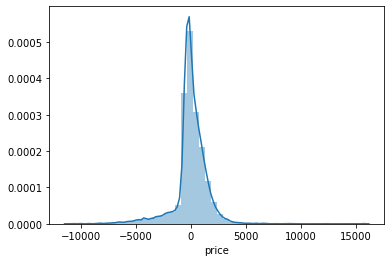

In [34]:
sns.distplot((y_pred-y_test));

In [35]:
# Model Equation
# y = m1x1 + m2x2 + m3x3 + c
model.coef_

array([9332.75116576, -165.25574925, -835.22652914])

In [36]:
model.intercept_

393.8377815439685

In [37]:
X.columns

Index(['carat', 'y', 'z'], dtype='object')

In [38]:
dict(zip(list(model.coef_), X.columns))

{9332.751165762118: 'carat', -165.25574925203796: 'y', -835.226529138958: 'z'}

In [39]:
# Final Equation of Model
for i, j in dict(zip(list(model.coef_), X.columns)).items():
    print(str(i),'*',j,'+')
    
print('393.8377815439685')


9332.751165762118 * carat +
-165.25574925203796 * y +
-835.226529138958 * z +
393.8377815439685
